In [16]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
FILE_PATH =r"C:\Users\KDP15\Documents\카카오톡 받은 파일\바웰공정데이터(1차데이터).csv"

In [4]:
df = pd.read_csv(FILE_PATH)

In [6]:
X = df.drop(columns=['time', 'scale_pv'])
y= df['scale_pv']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)

# 테스트 세트에 대한 성능 평가
print("테스트 세트 R2 스코어:", tpot.score(X_test, y_test))

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


                                                                                
Generation 1 - Current best internal CV score: -2561.3888062336573
                                                                                
Generation 2 - Current best internal CV score: -2559.7471321899543
                                                                                  
Generation 3 - Current best internal CV score: -2522.3976165554
                                                                                  
Generation 4 - Current best internal CV score: -2520.051436044036
                                                                                
Generation 5 - Current best internal CV score: -2520.051436044036
                                                             
Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.6500000000000001, min_samples_leaf=1, min_samples_split=14, n_estimators=100)
테스트 세트 R2 스코어: -2584.1927425392523


In [ ]:
tpot

<bound method Pipeline.set_params of Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(max_features=0.6500000000000001,
                                       min_samples_split=14))])>

In [17]:
best_model = tpot.fitted_pipeline_.steps[-1][1] 

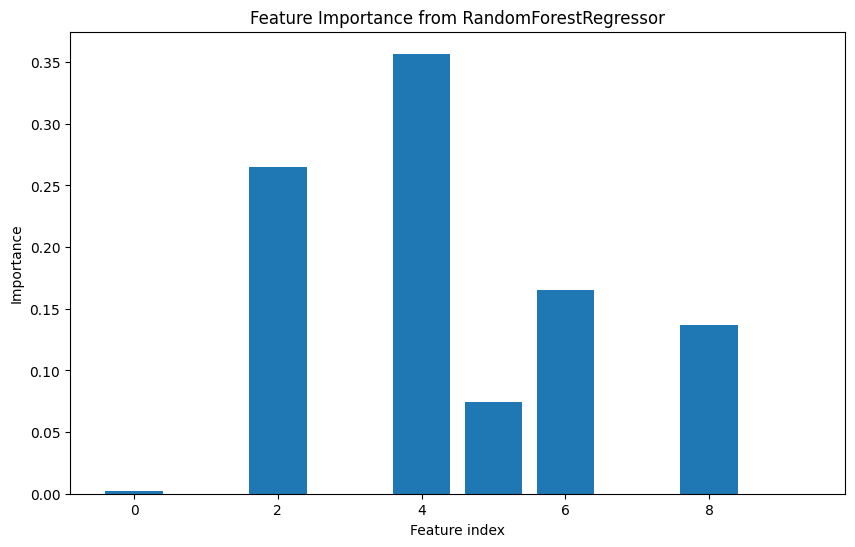

In [18]:
feature_importances = best_model.feature_importances_

# 피처 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xlabel('Feature index')
plt.ylabel('Importance')
plt.title('Feature Importance from RandomForestRegressor')
plt.show()